In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_excel("BASE DE DATOS MACI VF.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Estudiante           298 non-null    object 
 1   Generación           298 non-null    int64  
 2   Sexo                 298 non-null    object 
 3   PDT Lenguaje         298 non-null    int64  
 4   PDT Matemáticas      298 non-null    int64  
 5   XPDT                 298 non-null    float64
 6   PDT Historia         163 non-null    float64
 7   PDT Ciencias         187 non-null    float64
 8   Promedio Final IVM   298 non-null    object 
 9   Asistencia IVM       298 non-null    int64  
 10  LEN IVM              298 non-null    float64
 11  INGIVM               218 non-null    object 
 12  MAtIVM               298 non-null    float64
 13  HIAIVM               218 non-null    object 
 14  FILIVM               258 non-null    object 
 15  FETIVM               218 non-null    obj

In [4]:
#eliminamos columnas que tengan más de 100 NaNs
max_number_of_nas = 100
df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nas)]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Estudiante           298 non-null    object 
 1   Generación           298 non-null    int64  
 2   Sexo                 298 non-null    object 
 3   PDT Lenguaje         298 non-null    int64  
 4   PDT Matemáticas      298 non-null    int64  
 5   XPDT                 298 non-null    float64
 6   Promedio Final IVM   298 non-null    object 
 7   Asistencia IVM       298 non-null    int64  
 8   LEN IVM              298 non-null    float64
 9   INGIVM               218 non-null    object 
 10  MAtIVM               298 non-null    float64
 11  HIAIVM               218 non-null    object 
 12  FILIVM               258 non-null    object 
 13  FETIVM               218 non-null    object 
 14  BIOIVM               218 non-null    object 
 15  FISQUMIVM            231 non-null    obj

In [6]:
diccionario = {'EX':np.nan,'-':np.nan,'6,0':6.0,'6,1':6.1,'6,2':6.2,'6,3':6.3,'6,4':6.4,'6,5':6.5,'6,6':6.6,'6,7':6.7,'6,8':6.8,'6,9':6.9,'7,0':7,'6.8':6.8,'4,8':4.8,'4.8':4.8,'5,1':5.1,'5,2':5.2,'5,7':5.7,'5,9':5.9,'6.9':6.9}

In [7]:
df=df.replace(diccionario)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Estudiante           298 non-null    object 
 1   Generación           298 non-null    int64  
 2   Sexo                 298 non-null    object 
 3   PDT Lenguaje         298 non-null    int64  
 4   PDT Matemáticas      298 non-null    int64  
 5   XPDT                 298 non-null    float64
 6   Promedio Final IVM   298 non-null    float64
 7   Asistencia IVM       298 non-null    int64  
 8   LEN IVM              298 non-null    float64
 9   INGIVM               218 non-null    float64
 10  MAtIVM               298 non-null    float64
 11  HIAIVM               218 non-null    float64
 12  FILIVM               218 non-null    float64
 13  FETIVM               218 non-null    float64
 14  BIOIVM               218 non-null    float64
 15  FISQUMIVM            217 non-null    flo

In [9]:
df['promedio matematicas'] = df[['MAtIVM', 'MAtIIIM','MAtIIM','MAtIM']].mean(axis=1)

In [10]:
df['promedio matematicas I y II'] = df[['MAtIIM','MAtIM']].mean(axis=1)

In [11]:
Z = df['MAtIVM'].to_numpy()
Z = Z.reshape(-1,1)
Z.shape

(298, 1)

In [12]:
y = df['PDT Matemáticas'].to_numpy()
y.shape

(298,)

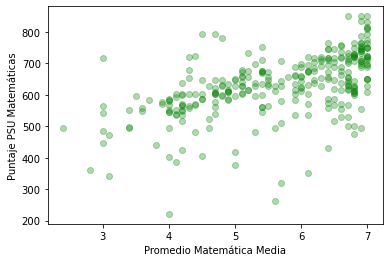

In [13]:
plt.figure()
plt.scatter(Z,y, alpha=0.3, color='g')
plt.xlabel('Promedio Matemática Media')
plt.ylabel('Puntaje PSU Matemáticas')
plt.show()

In [14]:
Z2 = df['MAtIIM'].to_numpy()
Z2 = Z2.reshape(-1,1)
Z2.shape

(298, 1)

In [15]:
Z3 = df['MAtIM'].to_numpy()
Z3 = Z3.reshape(-1,1)
Z3.shape

(298, 1)

In [16]:
Z4 = df['MAtIIIM'].to_numpy()
Z4 = Z4.reshape(-1,1)
Z4.shape

(298, 1)

In [17]:
Zn = df.to_numpy()
Zn = Zn.reshape(-1,1)
Zn.shape

(18774, 1)

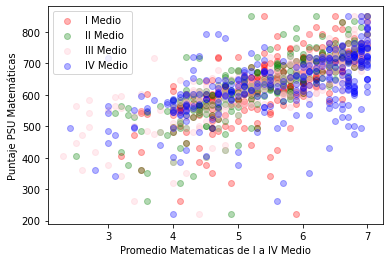

In [18]:
plt.figure()
plt.scatter(Z3,y, alpha=0.3, color='red', label='I Medio')
plt.scatter(Z2,y, alpha=0.3, color='green', label='II Medio')
plt.scatter(Z4,y, alpha=0.3, color='pink', label='III Medio')
plt.scatter(Z,y, alpha=0.3, color='blue', label='IV Medio')
plt.legend()
plt.xlabel('Promedio Matematicas de I a IV Medio')
plt.ylabel('Puntaje PSU Matemáticas')
plt.show()

In [19]:
df.describe()

,Generación,PDT Lenguaje,PDT Matemáticas,XPDT,Promedio Final IVM,Asistencia IVM,LEN IVM,INGIVM,MAtIVM,HIAIVM,...,HIAIM,FETIM,BIOIM,FISIM,QUIMIM,ARTIM,TECIM,EFIiM,promedio matematicas,promedio matematicas I y II
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,218.000000,298.000000,218.000000,...,298.000000,248.000000,298.000000,298.000000,298.000000,297.000000,298.000000,298.000000,298.000000,298.000000
mean,2018.194631,613.016779,630.687919,621.852349,6.298322,95.338926,5.988255,6.138991,5.647651,6.038073,...,5.578523,6.026210,5.799664,5.487248,5.944295,6.589899,6.340604,6.746309,5.475419,5.429530
std,1.440996,86.654873,98.850633,79.923564,0.463442,4.768997,0.604609,0.738346,1.136216,0.571738,...,0.581194,0.705099,0.731011,0.722909,0.690180,0.444826,0.502313,0.307269,0.915227,0.889473
min,2016.000000,301.000000,221.000000,305.000000,4.800000,77.000000,4.200000,3.700000,2.400000,4.300000,...,4.200000,4.000000,3.400000,3.300000,4.100000,4.900000,4.000000,4.000000,3.075000,2.850000
25%,2017.000000,562.250000,577.250000,581.625000,6.000000,93.000000,5.600000,5.600000,4.700000,5.600000,...,5.100000,5.700000,5.300000,4.925000,5.425000,6.400000,6.100000,6.700000,4.781250,4.700000
50%,2018.000000,620.000000,633.000000,628.500000,6.400000,97.000000,6.100000,6.400000,5.900000,6.100000,...,5.600000,6.100000,5.900000,5.500000,6.000000,6.700000,6.400000,6.800000,5.525000,5.450000
75%,2020.000000,669.000000,702.750000,673.500000,6.700000,100.000000,6.500000,6.700000,6.700000,6.475000,...,6.100000,6.500000,6.400000,6.100000,6.500000,6.900000,6.700000,6.900000,6.225000,6.150000
max,2020.000000,802.000000,850.000000,797.500000,7.000000,100.000000,6.900000,7.000000,7.000000,7.000000,...,6.800000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [20]:
from collections import Counter
Y2=df['MAtIM'].to_list()
d=Counter(Y2)
dfn1 = pd.DataFrame.from_dict(d, orient='index').reset_index()
Y3=df['MAtIIM'].to_list()
d=Counter(Y3)
dfn2 = pd.DataFrame.from_dict(d, orient='index').reset_index()
Y4=df['MAtIIIM'].to_list()
d=Counter(Y4)
dfn3 = pd.DataFrame.from_dict(d, orient='index').reset_index()
Y5=df['MAtIVM'].to_list()
d=Counter(Y5)
3dfn4 = pd.DataFrame.from_dict(d, orient='index').reset_index()
3df['INGIVM'].isnull().sum()

SyntaxError: invalid syntax (<ipython-input-20-d57412e93573>, line 13)

NameError: name 'dfn1' is not defined

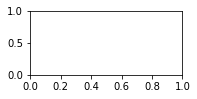

In [21]:
plt.subplot(3,2,1)
plt.bar(dfn1['index'],dfn1[0])
plt.xlabel('I Medio')
plt.subplot(3,2,2)
plt.bar(dfn2['index'],dfn2[0])
plt.xlabel('II Medio')
plt.subplot(3,2,5)
plt.bar(dfn3['index'],dfn3[0])
plt.xlabel('III Medio')
plt.subplot(3,2,6)
plt.bar(dfn4['index'],dfn4[0])
plt.xlabel('IV Medio')
plt.show()



In [22]:
from sklearn.model_selection import train_test_split
df = df.fillna(0)
X = df.drop('PDT Matemáticas',axis=1)
X= X.drop('Estudiante',axis=1)
X= X.drop('Sexo',axis=1)
X = X.drop('PDT Lenguaje',axis=1)
X = X.drop ('XPDT',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,            # Datos y etiquetas 
                                                    test_size=0.3,   # Proporción del dataset que será del conjunto de test
                                                    random_state=42) # Controla el shuffle de los datos antes de hacer el split

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
test_X = np.arange(X.min(),X.max())
test_X.shape

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
y_pred = lin_reg.predict(X_test)
y_pred.shape

(90,)

ValueError: x and y must be the same size

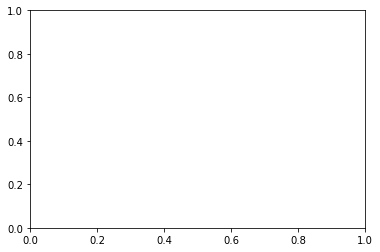

In [26]:
plt.figure()
plt.scatter(X,y, alpha=0.2)
plt.plot(test_X, y_pred, color='red', linewidth=2, alpha=0.7)
plt.scatter(test_X, y_pred, color='r', s=100, marker='*')
plt.show()

In [27]:
print(lin_reg.coef_)
from sklearn.metrics import mean_squared_error, r2_score

print(y.shape)
print(y_pred.shape)
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_test, y_pred))

[ -6.47115465  42.2215563   -1.84525033  12.18238389 -11.25233258
  -2.83941501  17.21398291 -20.24611142   8.63303869  -1.85570302
  25.84272086  -5.86947309  -5.00804061 -11.6783355  -17.54325313
   4.30986316 157.19040938  -1.22787497 -46.551463    14.04379451
  14.46741916  -9.86053785  -7.35092126 -40.01137877  -8.09427581
 -26.14470663 -32.39872034  20.37519748  -8.05753821  -9.8104645
 -92.87231989   0.8791757    1.95251885   2.78622554  30.15142577
  26.25258347  15.89963143   0.59416012  -3.32113321  13.575239
  27.8651142    8.1999169   23.58695656 -96.05916237   1.12636998
  47.48270091  -0.42953698   7.83398513 -17.53745065   9.33393601
   1.50829954  22.99838915   1.61953778  22.22028619 -13.02831531
  24.98188982  12.40335376  18.99270545]
(298,)
(90,)
Error cuadrático medio: 4275.15
Estadístico R_2: 0.62


In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)  # si no le damos el número de componentes a PCA, entrega explained_variance_ratio para sumar 1
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# componentes')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()
pca.explained_variance_ratio_

In [ ]:
pca = PCA()    # definimos el número de componentes a las que vamos a proyectar
pca.fit(X)
X_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,            # Datos y etiquetas 
                                                    test_size=0.3,   # Proporción del dataset que será del conjunto de test
                                                    random_state=42) # Controla el shuffle de los datos antes de hacer el split

In [ ]:
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train, y_train)

In [ ]:
y_pred_pca = lin_reg_pca.predict(X_test)
y_pred_pca.shape

In [ ]:
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred_pca))
print('Estadístico R_2: %.2f' % r2_score(y_test, y_pred_pca))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,            # Datos y etiquetas 
                                                    test_size=0.3,   # Proporción del dataset que será del conjunto de test
                                                    random_state=42) # Controla el shuffle de los datos antes de hacer el split

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
i=2
while i<6:
    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_, y_train)
    X_t = poly.fit_transform(X_test)
    y_predict = model.predict(X_t)
    print('Dimensión: %.0f' % i)
    print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_predict))
    print('Estadístico R_2: %.2f' % r2_score(y_test, y_predict))
    i=i+1

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

ss = []
for n in ns:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)

    centers = kmeans.cluster_centers_
    
    labels = kmeans.labels_
    score = silhouette_score(X, labels)

    ss.append(score)
    print ("n = ", n, ", silhouette = ", score)
    
plt.figure()
plt.plot(ns, ss)
plt.ylabel("Silhouette Score")
plt.xlabel ("# clusters")
plt.grid()
plt.show()
ss=[]
for n in ns:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_pca)

    centers = kmeans.cluster_centers_
    
    labels = kmeans.labels_
    score = silhouette_score(X_pca, labels)

    ss.append(score)
    print ("n = ", n, ", silhouette = ", score)
    
plt.figure()
plt.plot(ns, ss)
plt.ylabel("Silhouette Score")
plt.xlabel ("# clusters")
plt.grid()
plt.show()

In [ ]:
# get importance
importance = lin_reg.coef_
#summarize feature importance
for i,v in enumerate(importance):
print('Feature: %0d, Nombre %s Score: %.5f' % (i,X.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()